In [1]:
! pip install facebook-scraper sumy deep-translator googletrans==3.1.0a0 dominate dostoevsky --quiet

     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 94 kB 1.3 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 1.3 MB 56.0 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 288 kB 44.7 MB/s 
     |████████████████████████████████| 132 kB 45.1 MB/s 
     |████████████████████████████████| 749 kB 53.4 MB/s 
     |████████████████████████████████| 83 kB 1.8 MB/s 
     |████████████████████████████████| 138 kB 53.5 MB/s 
     |████████████████████████████████| 112 kB 58.3 MB/s 
     |████████████████████████████████| 10.1 MB 46.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 127 kB 58.4 MB/s 
     |███████████

In [2]:
! python -m dostoevsky download fasttext-social-network-model

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
cookies_path = '/content/gdrive/MyDrive/In progress/Magistracy/Диплом мага/fb_comments/helper_files/netscape_cookies.txt'
data_folder_path = '/content/gdrive/MyDrive/In progress/Magistracy/Диплом мага/fb_comments/data/'

In [5]:
from facebook_scraper import get_posts
import pandas as pd
from deep_translator import GoogleTranslator
from googletrans import Translator
import time
import dominate
from datetime import datetime
import ast
import _pickle as pickle
import re
import string
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
import numpy as np

In [6]:
posts = []
for post in get_posts('GummyDrop', pages=4, cookies=cookies_path, options={'comments': True}):
  posts.append(post)

/usr/local/lib/python3.7/dist-packages/facebook_scraper/facebook_scraper.py:857: UserWarning: Facebook says 'Unsupported Browser'
  warnings.warn(f"Facebook says 'Unsupported Browser'")


In [7]:
len(posts)

13

In [8]:
comments_n = []
for p in posts:
  comments_n.append(p['comments'])
comments_n

[7, 0, 70, 14, 36, 58, 14, 32, 24, 114, 24, 286, 28]

### Загрузка комментариев с Google Play 

In [15]:
!pip install -qq google-play-scraper

     |████████████████████████████████| 52 kB 1.8 MB/s 


In [16]:
!pip install -qq -U watermark

In [17]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

pandas             : 1.3.5
matplotlib         : 3.2.2
seaborn            : 0.11.2
google_play_scraper: 1.1.0



In [19]:
import json
import pandas as pd
from tqdm import tqdm

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [20]:
app_packages = [
  'com.bigfishgames.gummydropgoogle'
]

In [21]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 1/1 [00:00<00:00,  7.06it/s]


In [22]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [23]:
print_json(app_infos[0])

{
  "adSupported": true,
  "appId": "com.bigfishgames.gummydropgoogle",
  "containsAds": true,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Gummy Drop! is the exciting Match 3 puzzle game where you restore monuments \ud83c\udfdb\ufe0f and rebuild cities around the world \ud83c\udf0d, one gummy at a time!\r\n\r\nPack your bags and get ready to fill up your passport in this global matching game. Be the traveler and the tour guide, completing puzzles to rebuild and restore thousands of monuments from over 100 real cities across the globe \ud83c\udf0d. Rebuild famous landmarks in iconic cities like New York \ud83c\udf55, Sydney, Tokyo\ud83d\uddfc, Paris, London, Rome, Berlin, New Orleans and Barcelona. Hang with the locals and see the sights, from the Eiffel Tower to the Statue of Liberty \ud83d\uddfd and more!\r\n\r\nTRAVEL WHERE YOU WANT, WHEN YOU WANT!\r\nIn Gummy Drop! you get to match and build in the city of your choice whe

In [37]:
from skimage import io

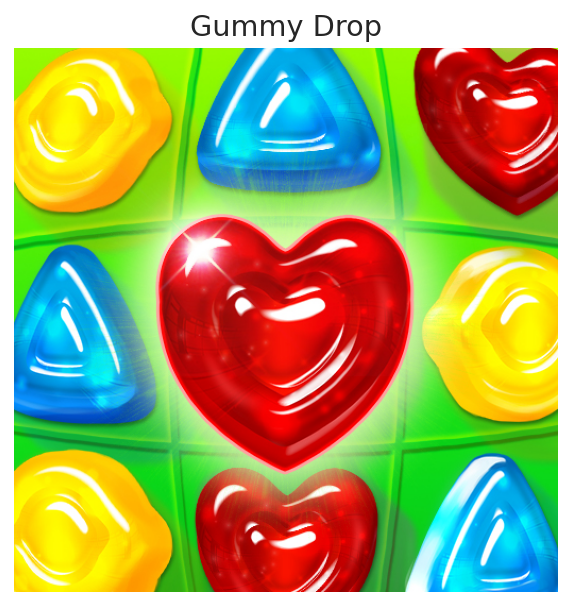

In [39]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

n = len(app_infos)
fig, axs = plt.subplots(2 if n > 1 else 1, n // 2 if n > 1 else 1, figsize=(14, 5))

if not isinstance(axs, np.ndarray):
  axs = np.array([axs])

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  # print_json(ai)
  img = io.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [40]:
apps_path = f'{data_folder_path}apps.csv'

In [41]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv(apps_path, index=None, header=True)

In [42]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 50000 if score == 3 else 50000,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 1/1 [04:04<00:00, 244.22s/it]


In [43]:
print_json(app_reviews[0])

{
  "appId": "com.bigfishgames.gummydropgoogle",
  "at": "2022-06-12 14:58:02",
  "content": "I used to enjoy this game, but now it is full of bugs, such as while playing and winning the server will disconnect me from game play. Now I'm getting the blue screen again, the one that says save to device or server, so when I beat the puzzle I have to start the damn thing again and lose what I have accomplished-not nice!!!",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "4.49.0",
  "reviewId": "b5804145-e8de-40fc-9b7e-59ca99a3da2d",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 10,
  "userImage": "https://play-lh.googleusercontent.com/a/AATXAJwuqyRKhBnSb7pg_HFyedDpdW-vkM291GILIveP=mo",
  "userName": "Mark Ludwig"
}



In [44]:
len(app_reviews)

123845

In [45]:
gp_time_str = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
gp_time_str, datetime.now()

('2022_06_19_11_27_27', datetime.datetime(2022, 6, 19, 11, 27, 27, 489465))

In [46]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_path = f'{data_folder_path}gp_reviews_{gp_time_str}.csv'
app_reviews_df.to_csv(app_reviews_path, index=None, header=True)

In [47]:
app_reviews_df['at'].max(), app_reviews_df['at'].min()

(Timestamp('2022-06-19 07:24:25'), Timestamp('2014-12-10 10:14:18'))

### Загрузка комментариев с App Store

In [49]:
!pip install app_store_scraper --quiet

In [50]:
from app_store_scraper import AppStore

gd_app_store = AppStore(country='us', app_id=828578246, app_name='Gummy Drop! Match 3 Puzzles')
gd_app_store.review(after=datetime.datetime(2022, 1, 1))

2022-06-19 11:37:13,349 [INFO] Base - Initialised: AppStore('us', 'gummy-drop-match-3-puzzles', 828578246)
2022-06-19 11:37:13,352 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/gummy-drop-match-3-puzzles/id828578246
2022-06-19 11:37:18,465 [INFO] Base - [id:828578246] Fetched 42 reviews (42 fetched in total)
2022-06-19 11:37:23,652 [INFO] Base - [id:828578246] Fetched 81 reviews (81 fetched in total)
2022-06-19 11:37:28,984 [INFO] Base - [id:828578246] Fetched 117 reviews (117 fetched in total)
2022-06-19 11:37:49,963 [INFO] Base - [id:828578246] Fetched 126 reviews (126 fetched in total)
2022-06-19 11:37:55,413 [INFO] Base - [id:828578246] Fetched 149 reviews (149 fetched in total)
2022-06-19 11:38:00,658 [INFO] Base - [id:828578246] Fetched 158 reviews (158 fetched in total)
2022-06-19 11:38:06,022 [INFO] Base - [id:828578246] Fetched 158 reviews (158 fetched in total)
2022-06-19 11:38:27,662 [ERROR] Base - Something went wrong: HTTPSConnectionPool(host='am

In [51]:
print_json(gd_app_store.reviews[0])

{
  "date": "2022-06-07 13:49:27",
  "isEdited": false,
  "rating": 5,
  "review": "Now all I get is a blank screen. Please get this game fixed. Well, it is hours later and still a blank screen!!! 4/14 was doing good with clicking on the one to get coins but the TOO LARGE ad for Zen came on again. Now I can\u2019t do anything. When are you going to fix that?!?!?? It was so nice to be able to play this game for a few days but the Zen ad has stopped me again. Ad is TOO LARGE and won\u2019t let you do anything! Now I can\u2019t play! DARN! 4/24 I\u2019m still complaining! Now just about every ad goes to a black screen and waiting or tapping around it does nothing! I\u2019m missing being able to play this game I love so much.! This has been going on for several days. 4/26 Zen Match still not putting up an x to close and it is blacking out! WHEN ARE YOU GOING TO GET THIS FIXED FOR GOOD? It is hours later and I still cannot play!!! 4/27 Now it is Tripeaks Solitaire that won\u2019t let me get

In [52]:
print(len(gd_app_store.reviews))
for i in gd_app_store.reviews:
    print(i['date'], ' ', i['review'], '\n')

158
2022-06-07 13:49:27   Now all I get is a blank screen. Please get this game fixed. Well, it is hours later and still a blank screen!!! 4/14 was doing good with clicking on the one to get coins but the TOO LARGE ad for Zen came on again. Now I can’t do anything. When are you going to fix that?!?!?? It was so nice to be able to play this game for a few days but the Zen ad has stopped me again. Ad is TOO LARGE and won’t let you do anything! Now I can’t play! DARN! 4/24 I’m still complaining! Now just about every ad goes to a black screen and waiting or tapping around it does nothing! I’m missing being able to play this game I love so much.! This has been going on for several days. 4/26 Zen Match still not putting up an x to close and it is blacking out! WHEN ARE YOU GOING TO GET THIS FIXED FOR GOOD? It is hours later and I still cannot play!!! 4/27 Now it is Tripeaks Solitaire that won’t let me get out of it! This is really tiring and upsetting that you can’t get the ads to work prope

In [55]:
ap_reviews = gd_app_store.reviews
ap_time_str = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
ap_reviews_df = pd.DataFrame(ap_reviews)
ap_reviews_path = f'{data_folder_path}ap_reviews_{ap_time_str}.csv'
ap_reviews_df.to_csv(ap_reviews_path, index=None, header=True)

## Сохранение постов для того, чтобы каждый раз их не запрашивать с Фэйсбука во время работы на случай проблем с ноутбуком

In [56]:
posts_csv = pd.DataFrame(posts)
posts_time_str = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
posts_csv.to_csv(f'{data_folder_path}csv_posts_{posts_time_str}.csv', index=False, sep='\t', encoding='utf-32')
posts_csv.head()

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,reactors,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live
0,5356675844390884,🏛️ MONUMENTAL MOMENTUM!🏛️ You built 1 MILLION ...,🏛️ MONUMENTAL MOMENTUM!🏛️ You built 1 MILLION ...,,🏛️ MONUMENTAL MOMENTUM!🏛️ You built 1 MILLION ...,2022-06-18 19:15:01,1655579701,https://scontent-ams4-1.xx.fbcdn.net/v/t39.308...,https://scontent-ams4-1.xx.fbcdn.net/v/t39.308...,[https://scontent-ams4-1.xx.fbcdn.net/v/t39.30...,...,None,None,None,None,None,785876241470890,None,5356675121057623,[5356675121057623],False
1,5354113761313759,🔝 Need a boost this weekend? Now's the time to...,🔝 Need a boost this weekend? Now's the time to...,,🔝 Need a boost this weekend? Now's the time to...,2022-06-17 22:02:38,1655503358,https://scontent-ams4-1.xx.fbcdn.net/v/t39.308...,https://scontent-ams4-1.xx.fbcdn.net/v/t39.308...,[https://scontent-ams4-1.xx.fbcdn.net/v/t39.30...,...,None,None,None,None,None,785876241470890,None,5354094567982345,[5354094567982345],False
2,5350907888301013,"😧 🚧 Uh oh, the Gummy community is a bit behind...","😧 🚧 Uh oh, the Gummy community is a bit behind...",,None,2022-06-16 21:45:01,1655415901,https://scontent-ams2-1.xx.fbcdn.net/v/t39.308...,https://scontent-ams2-1.xx.fbcdn.net/v/t39.308...,[https://scontent-ams2-1.xx.fbcdn.net/v/t39.30...,...,None,None,None,None,None,785876241470890,None,5350905881634547,[5350905881634547],False
3,5350891404969328,🌼🌸🌹 It's time for a special spring puzzle! Can...,🌼🌸🌹 It's time for a special spring puzzle! Can...,,🌼🌸🌹 It's time for a special spring puzzle! Can...,2022-06-16 19:15:00,1655406900,https://scontent-ams2-1.xx.fbcdn.net/v/t39.308...,https://scontent-ams2-1.xx.fbcdn.net/v/t39.308...,[https://scontent-ams2-1.xx.fbcdn.net/v/t39.30...,...,None,None,None,None,None,785876241470890,None,5350889341636201,[5350889341636201],False
4,5342657022459433,Relish today... Ketchup tomorrow 😄. Join us as...,Relish today... Ketchup tomorrow 😄. Join us as...,,Relish today... Ketchup tomorrow 😄. Join us as...,2022-06-13 22:30:03,1655159403,https://scontent-ams4-1.xx.fbcdn.net/v/t39.308...,https://scontent-ams4-1.xx.fbcdn.net/v/t39.308...,[https://scontent-ams4-1.xx.fbcdn.net/v/t39.30...,...,None,None,None,None,None,785876241470890,None,5342653352459800,[5342653352459800],False


In [ ]:
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, -1)
def load_object(filename):
  with open(filename, 'rb') as inp:
    return pickle.load(inp)

In [ ]:
save_object(posts, 'postsss2022_06_07.pkl')
p = load_object('postsss2022_06_07.pkl')
p[5]

{'available': True,
 'comments': 4,
 'comments_full': [{'comment_id': '380713957365237',
   'comment_image': 'https://scontent.xx.fbcdn.net/m1/v/t6/An_UvxJXg9tdnLU3Y5qjPi0200MLilhzPXUgxzGjQzUMaNcmjdZA6anyrngvkdub33NZzZhd51fpCAEzNHFhko5aKRFP5fS1w_lKwYrzcNLupv27.png?ccb=10-5&oh=00_AT-KJePPMeM2icU0KtRPc-0_rQmC8jRuethRlxS3xNr3KA&oe=62A2FCF9&_nc_sid=55e238',
   'comment_reaction_count': None,
   'comment_reactions': None,
   'comment_reactors': [],
   'comment_text': 'https://\nm.facebook.com/\ngroups/\n1080785368610845\n/',
   'comment_time': None,
   'comment_url': 'https://facebook.com/380713957365237',
   'commenter_id': '100080393593081',
   'commenter_meta': None,
   'commenter_name': 'Niki Nemeth',
   'commenter_url': 'https://facebook.com/profile.php?id=100080393593081&fref=nf&rc=p&refid=52&__tn__=R',
   'replies': []},
  {'comment_id': '1747032055641561',
   'comment_image': None,
   'comment_reaction_count': None,
   'comment_reactions': None,
   'comment_reactors': [],
   'commen

## Определение функций обработки текста: перевод, детекция языка, сентиментальный анализ, извлечение английской части из текста (для постов)

In [9]:
translator = GoogleTranslator(source='auto', target='ru')
translator_en = GoogleTranslator(source='auto', target='en')
detector = Translator()

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

def get_sentiment(row):
  text = row['comment_ru_text']

  if text == None or len(text.strip()) == 0:
    sentiment = {}
  else:
    sentiment = model.predict([text], k=2)[0]
  
  keys = ['neutral', 'positive', 'negative']

  # res = {key: sentiment.get(key, 0) for key in keys}

  for key in keys:
    row[key] = sentiment.get(key, 0)

  return row

def translate(text, dest='ru', trans=None):
  if trans == None:
    trans = translator
  
  # time.sleep(10)
  
  return trans.translate(text)

def translate_en(text, dest='en', trans=None):
  if trans == None:
    trans = translator_en
  
  # time.sleep(10)
  
  return trans.translate(text)

def detect(text):
  return detector.detect(text).lang

def get_ru_post(text):
  splitted = text.split('\n')
  ru_text = ''

  for piece in splitted:
    if len(piece.strip()) == 0:
      continue
  
    lang = detect(piece)

    if lang == 'ru':
      ru_text += piece + '\n'
  
  if len(ru_text) == 0:
    ru_text = translator.translate(text)
  
  return ru_text

def get_en_post(text):
  splitted = text.split('\n')
  en_text = ''

  for piece in splitted:
    if len(piece.strip()) == 0:
      continue
  
    lang = detect(piece)

    if lang == 'en':
      en_text += piece + '\n'
  
  return en_text

def get_en_post_regexp(text):
  eng_text = ''.join(re.findall(r'[a-zA-Z]+[' + string.punctuation + ' ]*', text))
  # eng_text = re.sub(r'[a-zA-Z]+[' + string.punctuation + ' \n]*', '', text)
  return eng_text

## Обработка постов: перевод на русский, определение языка оригинального коммента, определение сентиментальной окраски, извлечение англ части поста, перевод на русский

In [10]:
posts_df = pd.DataFrame()

for post in posts:
  df = pd.DataFrame()
  if post['comments'] > 0:
    df = pd.DataFrame.from_dict(post['comments_full'])
    df['comment_ru_text'] = df['comment_text'].apply(translate)
    df['comment_lang'] = df['comment_text'].apply(detect)
    df = df.apply(get_sentiment, axis=1)
    # df['comment_sentiment'] = df['comment_ru_text'].apply(get_sentiment)
  
  df['post_time'] = post['time']
  df['post_url'] = post['post_url']
  post_text = get_en_post_regexp(post['text'])
  df['post_text'], df['post_ru_text'] = post_text, translate(post_text)
  
  posts_df = pd.concat([posts_df, df])

posts_df.head()

,comment_id,comment_url,commenter_id,commenter_url,commenter_name,commenter_meta,comment_text,comment_time,comment_image,comment_reactors,...,replies,comment_ru_text,comment_lang,neutral,positive,negative,post_time,post_url,post_text,post_ru_text
0,2958405861116640,https://facebook.com/2958405861116640,100061383829604,https://facebook.com/martyn.george.750?fref=nf...,Martyn George,None,What happen to my last few bonuses,2022-06-19 20:15:07,https://scontent.xx.fbcdn.net/m1/v/t6/An_UvxJX...,[],...,[],Что случилось с моими последними бонусами,en,0.749097,0.119213,0.000000,2022-06-19 19:30:01,https://facebook.com/GummyDrop/posts/535942914...,You are THIS CLOSE to unlocking bonus rewards!...,Вы ЭТО БЛИЗКО к разблокировке бонусных наград!...
1,511532557374900,https://facebook.com/511532557374900,100009616710747,https://facebook.com/heidi.heidi.777363?fref=n...,Heidi Heidi,None,Keinem Bonus bekommen. 🤔😡,2022-06-19 20:15:07,None,[],...,[],Не получил бонус. 🤔😡,de,0.874087,0.000000,0.055015,2022-06-19 19:30:01,https://facebook.com/GummyDrop/posts/535942914...,You are THIS CLOSE to unlocking bonus rewards!...,Вы ЭТО БЛИЗКО к разблокировке бонусных наград!...
2,1071280333595524,https://facebook.com/1071280333595524,626309883,https://facebook.com/janesgrapevine?fref=nf&rc...,Jane Willis,None,"Tomorrow’s going to be helping locals, isn’t i...",2022-06-19 20:15:07,None,[],...,[],"Завтра будем помогать местным, не так ли? Я на...",en,0.705795,0.000000,0.294225,2022-06-19 19:30:01,https://facebook.com/GummyDrop/posts/535942914...,You are THIS CLOSE to unlocking bonus rewards!...,Вы ЭТО БЛИЗКО к разблокировке бонусных наград!...
3,500031061809693,https://facebook.com/500031061809693,100006540571662,https://facebook.com/ruth.miller.908132?fref=n...,Ruth Ann Miller,None,My game keeps freezing up so don’t play much a...,2022-06-19 21:15:07,None,[],...,[],"Моя игра постоянно зависает, поэтому больше не...",en,0.917313,0.000000,0.136618,2022-06-19 19:30:01,https://facebook.com/GummyDrop/posts/535942914...,You are THIS CLOSE to unlocking bonus rewards!...,Вы ЭТО БЛИЗКО к разблокировке бонусных наград!...
4,1023817351603892,https://facebook.com/1023817351603892,1215526989,https://facebook.com/william.lahti.12?fref=nf&...,William Lahti,None,Bring back building rush!,2022-06-19 21:15:07,None,[],...,[],Верните строительную спешку!,en,0.912446,0.000000,0.048868,2022-06-19 19:30:01,https://facebook.com/GummyDrop/posts/535942914...,You are THIS CLOSE to unlocking bonus rewards!...,Вы ЭТО БЛИЗКО к разблокировке бонусных наград!...


In [11]:
posts_df['negative'] = posts_df['negative'].astype(float)
posts_df['neutral'] = posts_df['neutral'].astype(float)
posts_df['positive'] = posts_df['positive'].astype(float)

In [12]:
columns = ['negative', 'neutral', 'positive',
           'comment_time', 'comment_ru_text', 
           'post_time', 'post_ru_text', 'post_url',	'post_text',	
           'comment_lang', 'comment_text', 'comment_id', 'comment_url', 
           'commenter_id', 'commenter_url', 'commenter_name',	
           'comment_image',	'comment_reactors',	'comment_reactions',
           'comment_reaction_count',	'replies']

In [13]:
time_str = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
time_str, datetime.now()

('2022_06_19_23_19_34', datetime.datetime(2022, 6, 19, 23, 19, 34, 130057))

In [14]:
posts_df = posts_df.sort_values(by=['negative', 'neutral', 'positive'], ascending=[False, True, True], ignore_index=True)[columns]
posts_df = posts_df.loc[:,~posts_df.columns.duplicated()]
posts_df.head()

,negative,neutral,positive,comment_time,comment_ru_text,post_time,post_ru_text,post_url,post_text,comment_lang,...,comment_id,comment_url,commenter_id,commenter_url,commenter_name,comment_image,comment_reactors,comment_reactions,comment_reaction_count,replies
0,0.914911,0.384922,0.0,NaT,Уже закончил это,2022-06-13 22:30:03,Наслаждайтесь сегодня... Кетчуп завтра Присоед...,https://facebook.com/GummyDrop/posts/534265702...,Relish today... Ketchup tomorrow Join us as we...,en,...,1006085076940646,https://facebook.com/1006085076940646,1582664571,https://facebook.com/Blondiecoltsfan?fref=nf&r...,Teri Let's Go Colts,None,[],None,None,[]
1,0.826722,0.699264,0.0,2022-06-12 23:15:46,Не получайте призы и не получайте ничего,2022-06-12 15:00:36,Способ протолкнуть вторую цель сообщества! В ц...,https://facebook.com/GummyDrop/posts/533422621...,Way to push through your second Community Goal...,en,...,1928733730850885,https://facebook.com/1928733730850885,100011101513735,https://facebook.com/karen.kutscher.1?fref=nf&...,Karen Kutscher,None,[],None,None,[]
2,0.782673,0.000000,0.0,2022-06-18 00:00:00,Опять без награды....,2022-06-18 19:15:01,МОНУМЕНТАЛЬНЫЙ ИМПУЛЬС! На этой неделе вы пост...,https://facebook.com/GummyDrop/posts/535667584...,MONUMENTAL MOMENTUM!You built MILLION monument...,en,...,1192598451558801,https://facebook.com/1192598451558801,1550482513,https://facebook.com/helen.diamond.7?fref=nf&r...,Helen Diamond,None,[],None,None,[]
3,0.782673,0.233716,0.0,2022-06-17 00:00:00,"Никогда не получал последний приз, так зачем б...",2022-06-16 21:45:01,"О, сообщество Gummy немного отстает от графика...",https://facebook.com/GummyDrop/posts/535090788...,"Uh oh, the Gummy community is a bit behind sch...",en,...,3312229035667831,https://facebook.com/3312229035667831,599338304,https://facebook.com/leonie.price.5?fref=nf&rc...,Leonie Price,https://scontent.xx.fbcdn.net/m1/v/t6/An_UvxJX...,[],None,None,[]
4,0.754925,0.384922,0.0,2022-06-19 13:15:12,У меня тоже последние несколько раз ничего не ...,2022-06-18 19:15:01,МОНУМЕНТАЛЬНЫЙ ИМПУЛЬС! На этой неделе вы пост...,https://facebook.com/GummyDrop/posts/535667584...,MONUMENTAL MOMENTUM!You built MILLION monument...,de,...,1465777910543458,https://facebook.com/1465777910543458,100002648873135,https://facebook.com/monika.wiedenhorst?fref=n...,Monika Wiedenhorst,None,[],None,None,[]


In [15]:
posts_df.to_csv(f'{data_folder_path}posts_csv_cp_{time_str}.csv', index=False, sep='\t', encoding='utf-32')

## Суммаризация

In [ ]:
import os
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
import nltk; nltk.download('punkt'); nltk.download('stopwords')
from nltk.corpus import stopwords
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from sumy.summarizers.lsa import LsaSummarizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
LANGUAGE = 'russian' #"english"
SENTENCES_COUNT = 100

In [ ]:
def get_text_from_comments(df):
    return '. '.join(s for s in df if s != None)

def summ_it_luhn(text):
    parser = PlaintextParser.from_string(text, Tokenizer(LANGUAGE))
    stemmer = Stemmer(LANGUAGE)
    summarizer = LuhnSummarizer(stemmer)
    summarizer.stop_words = stopwords.words(LANGUAGE)#get_stop_words(LANGUAGE)

    return [str(s) for s in summarizer(parser.document, SENTENCES_COUNT)]

def get_data_rows(sentences, data):
    result = pd.DataFrame()
    for s in sentences:
        mask = data['comment_ru_text'].str.contains(s)
        result = result.append(data.loc[mask], ignore_index=True)
    return result

In [ ]:
bad_df = posts_df.dropna(subset=['comment_ru_text'])
bad_df = bad_df[(bad_df['negative'] > 0.3) & (bad_df['positive'] <= 0.3) & (bad_df['neutral'] <= 0.5)].sort_values(by=['post_time','negative'], ascending=False)
print(len(bad_df))
bad_df

5


,negative,neutral,positive,comment_time,comment_ru_text,post_time,post_ru_text,post_url,post_text,comment_lang,...,comment_id,comment_url,commenter_id,commenter_url,commenter_name,comment_image,comment_reactors,comment_reactions,comment_reaction_count,replies
2,0.665421,0.320831,0.0,2022-06-04,"Что ж, мне любопытно посмотреть, работает ли э...",2022-06-04 15:01:54,"Есть ли что-то, что вы не можете сделать, когд...",https://facebook.com/GummyDrop/posts/531176003...,Is there anything you cant do when you work to...,de,...,404382381580511,https://facebook.com/404382381580511,100042442576217,https://facebook.com/heike.wiechmann.338?fref=...,Heike Ina Kuchenmonster,https://scontent.xx.fbcdn.net/m1/v/t6/An_UvxJX...,[],None,None,[]
5,0.622469,0.300756,0.0,2022-06-04,"Я никогда ничего не получал, когда нажимал на ...",2022-06-04 15:01:54,"Есть ли что-то, что вы не можете сделать, когд...",https://facebook.com/GummyDrop/posts/531176003...,Is there anything you cant do when you work to...,en,...,3305350723085270,https://facebook.com/3305350723085270,1241280691,https://facebook.com/lisa.paine.96?fref=nf&rc=...,Lisa Paine,None,[],None,None,[]
1,0.705795,0.000000,0.0,2022-06-03,"Почему давно не наступало событие, где можно б...",2022-06-03 20:15:51,"Летний круиз, но ВЫ отвечаете за декор на этом...",https://facebook.com/GummyDrop/posts/531228115...,"A summer cruise, but YOU'RE in charge of the d...",en,...,577982070617198,https://facebook.com/577982070617198,100015639720214,https://facebook.com/alexis.marx.18?fref=nf&rc...,Alexis Marx,https://scontent.xx.fbcdn.net/m1/v/t6/An_UvxJX...,[],None,None,[]
13,0.307368,0.173298,0.0,2022-06-02,"Было бы неплохо, если бы ваша игра загружалась...",2022-06-02 18:00:00,"Мы уже знали, что наше сообщество полно победи...",https://facebook.com/GummyDrop/posts/530849558...,We already knew that our community was full of...,en,...,435780125052850,https://facebook.com/435780125052850,682752867,https://facebook.com/alidadwaine?fref=nf&rc=p&...,Alida Sordahl,None,[],None,None,[]
3,0.665421,0.362979,0.0,NaT,У меня постоянно возникают проблемы с зависани...,2022-05-30 15:00:02,"Ты выглядишь так, будто готов к новому вызову!...",https://facebook.com/GummyDrop/posts/529342684...,You look like youre up for a new challenge! He...,en,...,5305041892887613,https://facebook.com/5305041892887613,589439594,https://facebook.com/LinjBet?fref=nf&rc=p&refi...,Linda Murray-Betnar,None,[],None,None,[]


In [ ]:
bad_text = get_text_from_comments(bad_df['comment_ru_text'])
bad_text[:100]

'Что ж, мне любопытно посмотреть, работает ли это или, как это, к сожалению, часто бывает, это просто'

In [ ]:
summirized = summ_it_luhn(bad_text)
data_rows = get_data_rows(summirized, bad_df)
data_rows = data_rows.drop_duplicates(subset=['comment_id'])
data_rows.head(SENTENCES_COUNT)

,negative,neutral,positive,comment_time,comment_ru_text,post_time,post_ru_text,post_url,post_text,comment_lang,...,comment_id,comment_url,commenter_id,commenter_url,commenter_name,comment_image,comment_reactors,comment_reactions,comment_reaction_count,replies
0,0.705795,0.000000,0.0,2022-06-03,"Почему давно не наступало событие, где можно б...",2022-06-03 20:15:51,"Летний круиз, но ВЫ отвечаете за декор на этом...",https://facebook.com/GummyDrop/posts/531228115...,"A summer cruise, but YOU'RE in charge of the d...",en,...,577982070617198,https://facebook.com/577982070617198,100015639720214,https://facebook.com/alexis.marx.18?fref=nf&rc...,Alexis Marx,https://scontent.xx.fbcdn.net/m1/v/t6/An_UvxJX...,[],None,None,[]
1,0.665421,0.362979,0.0,NaT,У меня постоянно возникают проблемы с зависани...,2022-05-30 15:00:02,"Ты выглядишь так, будто готов к новому вызову!...",https://facebook.com/GummyDrop/posts/529342684...,You look like youre up for a new challenge! He...,en,...,5305041892887613,https://facebook.com/5305041892887613,589439594,https://facebook.com/LinjBet?fref=nf&rc=p&refi...,Linda Murray-Betnar,None,[],None,None,[]


## Вывод постов на html страницу

In [ ]:
posts_saved = pd.read_csv('posts_csv_cp_2022_06_07_06_07_41.csv', index_col=False, sep='\t', encoding='utf-32')
posts_saved.head()

,negative,neutral,positive,comment_time,comment_ru_text,post_time,post_ru_text,post_url,post_text,comment_lang,...,comment_id,comment_url,commenter_id,commenter_url,commenter_name,comment_image,comment_reactors,comment_reactions,comment_reaction_count,replies
0,0.817585,0.692652,0.0,2022-06-05 00:00:00,Никогда не получал этот.,2022-06-05 20:30:02,Поздравляем с достижением первой еженедельной ...,https://facebook.com/GummyDrop/posts/532004301...,Congratulations on completing your first weekl...,en,...,1863099683860713,https://facebook.com/1863099683860713,100014388304405,https://facebook.com/profile.php?id=1000143883...,Kathy Kuntz Peterson,NaN,[],NaN,NaN,[]
1,0.705795,0.000000,0.0,2022-06-03 00:00:00,"Почему давно не наступало событие, где можно б...",2022-06-03 20:15:51,"Летний круиз, но ВЫ отвечаете за декор на этом...",https://facebook.com/GummyDrop/posts/531228115...,"A summer cruise, but YOU'RE in charge of the d...",en,...,577982070617198,https://facebook.com/577982070617198,100015639720214,https://facebook.com/alexis.marx.18?fref=nf&rc...,Alexis Marx,https://scontent.xx.fbcdn.net/m1/v/t6/An_UvxJX...,[],NaN,NaN,[]
2,0.665421,0.320831,0.0,2022-06-04 00:00:00,"Что ж, мне любопытно посмотреть, работает ли э...",2022-06-04 15:01:54,"Есть ли что-то, что вы не можете сделать, когд...",https://facebook.com/GummyDrop/posts/531176003...,Is there anything you cant do when you work to...,de,...,404382381580511,https://facebook.com/404382381580511,100042442576217,https://facebook.com/heike.wiechmann.338?fref=...,Heike Ina Kuchenmonster,https://scontent.xx.fbcdn.net/m1/v/t6/An_UvxJX...,[],NaN,NaN,[]
3,0.665421,0.362979,0.0,NaN,У меня постоянно возникают проблемы с зависани...,2022-05-30 15:00:02,"Ты выглядишь так, будто готов к новому вызову!...",https://facebook.com/GummyDrop/posts/529342684...,You look like youre up for a new challenge! He...,en,...,5305041892887613,https://facebook.com/5305041892887613,589439594,https://facebook.com/LinjBet?fref=nf&rc=p&refi...,Linda Murray-Betnar,NaN,[],NaN,NaN,[]
4,0.644235,0.607673,0.0,2022-06-04 00:00:00,Никогда ничего не получай,2022-06-04 15:01:54,"Есть ли что-то, что вы не можете сделать, когд...",https://facebook.com/GummyDrop/posts/531176003...,Is there anything you cant do when you work to...,en,...,340641924879822,https://facebook.com/340641924879822,100023297451733,https://facebook.com/anne.drage.737?fref=nf&rc...,Anne Drage,NaN,[],NaN,NaN,[]


In [ ]:
import dominate
from dominate.tags import *

In [ ]:
def save_html(s, filename='main.html'):
  with open(filename, 'w') as fout:
    fout.write(s)
    fout.close()

In [ ]:
st = '''
* {
  box-sizing: border-box;
}

body {
  font-family: Arial, Helvetica, sans-serif;
}

/* Float four columns side by side */
.column {
  float: left;
  width: 25%;
  padding: 0 10px;
}

.post {
  width: 100%;
  padding: 0 10px;
}

/* Remove extra left and right margins, due to padding */
.row {margin: 0 -5px;}

/* Clear floats after the columns */
.row:after {
  content: "";
  display: table;
  clear: both;
}

/* Responsive columns */
@media screen and (max-width: 600px) {
  .column {
    width: 100%;
    display: block;
    margin-bottom: 20px;
  }
}

/* Style the counter cards */
.card {
  box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2);
  padding: 16px;
  text-align: center;
  background-color: #f1f1f1;
}

.line-break {
  display: flex;
  flex-flow: wrap;
  width: 100%;
}
'''

In [ ]:
def gen_html(df):
  h = html()
  h.add(style(st))
  h.add(meta(name="viewport", content="width=device-width, initial-scale=1"))
  with h.add(body()).add(div()):
        grouped = df.groupby(by='post_ru_text')
        posts_texts = grouped.groups.keys()

        with table().add(tbody()):

          for post_text in posts_texts:
            group = grouped.get_group(post_text)

            with div(_class='row'):
                # with div(_class='column'):
                  with div(_class='card'):
                    h2(post_text)
                    post_time = group.iloc[[0]]['post_time'].tolist()[0]
                    a(post_time.strftime("%d-%m-%Y, %H:%M:%S"), href=group.iloc[[0]]['post_url'])
                  with div(_class='row'):
                    for idx, comment in group.iterrows():
                      with div(_class='column'):
                        with div(_class='card'):
                          h3(comment['commenter_name'])

                          comment_time = comment['comment_time'].strftime("%d-%m-%Y, %H:%M:%S") \
                                        if not pd.isnull(comment['comment_time']) \
                                        else 'No time data'
                          a(comment_time, href=comment['comment_url'])

                          p(comment['comment_ru_text'])
                          p(comment['comment_text'])
                          img(src=comment['comment_image'])

  return h



In [ ]:
h = gen_html(bad_df)
save_html(str(h))

In [ ]:
css_boostrap = '''
@import url("http://fonts.googleapis.com/css?family=Comfortaa:wght@100;200;300;400;500;600;700;800&display=swap&subset=latin,cyrillic");

body {
    background-color: #eee;
    font-family: "Poppins", sans-serif;
    font-weight: 300
}

.card {
  box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2);
  padding: 16px;
  text-align: left;
  background-color: #f1f1f1;
}

.ellipsis {
    color: #a09c9c
}

hr {
    color: #a09c9c;
    margin-top: 4px;
    margin-bottom: 8px
}

.muted-color {
    color: #a09c9c;
    font-size: 13px
}

.ellipsis i {
    margin-top: 3px;
    cursor: pointer
}

.icons i {
    font-size: 25px
}

.icons .fa-heart {
    color: red
}

.icons .fa-smile-o {
    color: yellow;
    font-size: 29px
}

.rounded-image {
    border-radius: 50% !important;
    display: flex;
    justify-content: center;
    align-items: center;
    height: 50px;
    width: 50px
}

.name {
    font-weight: 600
}

.comment-text {
    font-size: 14px
}

.status small {
    margin-right: 10px;
    color: blue
}

.form-control {
    border-radius: 26px
}

.comment-input {
    position: relative
}

.fonts {
    position: absolute;
    right: 13px;
    top: 8px;
    color: #a09c9c
}

.form-control:focus {
    color: #495057;
    background-color: #fff;
    border-color: #8bbafe;
    outline: 0;
    box-shadow: none
}
'''

In [ ]:
import urllib.request

def gen_html_boostrap(df):
    h = html()
    h.add(style(css_boostrap))
    # h.add(meta(name="viewport", content="width=device-width, initial-scale=1"))
    with h.add(body()).add(div(width="300")):
          grouped = df.groupby(by='post_time')
          posts_times = sorted(grouped.groups.keys(), reverse=True)

          for post_time in posts_times:
            group = grouped.get_group(post_time)

            with div(_class="container mt-5 mb-5"):
              with div(_class="row d-flex align-items-center justify-content-center"):
                  with div(_class="col-md-6"):
                      post_text = group.iloc[[0]]['post_ru_text'].tolist()[0]
                      h2(post_text)
                      post_time = group.iloc[[0]]['post_time'].tolist()[0]
                      a(post_time.strftime("%a %d %b %Y, %H:%M:%S"), href=group.iloc[[0]]['post_url'])

                      with ul():#div(_class='comments'):
                        for idx, comment in group.iterrows():
                          # with div(_class="d-flex flex-column ml-2"):
                            # with div(_class="d-flex flex-row mb-2"):
                          with li():
                            with div(_class='card'):
                            
                              span(comment['commenter_name'], _class="name")
                            # with div(_class="d-flex flex-row mb-2"):
                              p(comment['comment_ru_text'], _class="comment-text")
                            # with div(_class="d-flex flex-row mb-2"):
                              p(comment['comment_text'], _class="comment-text")

                              comment_time = comment['comment_time'].strftime("%a %d %b %Y, %H:%M:%S") \
                                            if not pd.isnull(comment['comment_time']) \
                                            else 'No time data'
                            # with div(_class="d-flex flex-row mb-2"):
                              with div(_class="d-flex flex-row align-items-center status"):
                                p(a(comment_time, href=comment['comment_url']), _class="comment-text")
                            # with div(_class="d-flex flex-row mb-2"):
                              with div(_class="d-flex flex-row mt-1 ellipsis"):
                                try: 
                                  urllib.request.urlopen(urllib.request.Request(comment['comment_image']))
                                  img(src=comment['comment_image'], onerror="this.onerror=null", width="150")
                                except:
                                  continue

    return h

In [ ]:
save_html(str(gen_html_boostrap(bad_df)), 'bad_html.html')

## Песочница

In [ ]:
save_html(str(html(style(css_boostrap),img(src='https://scontent-iad3-1.xx.fbcdn.net/v/t39.30808-6/274708084_5042704349121370_7685921391532053864_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-5&_nc_sid=8024bb&efg=eyJpIjoidCJ9&_nc_ohc=VbxuYUNjCOUAX87z4sj&tn=qtXBk9pEfYknEs17&_nc_ht=scontent-iad3-1.xx&oh=00_AT-SZMQ9Y9ZTosJ6Tj6fymWiIdyOVuroRhdhe64PwJX8-g&oe=62219E97', width="250", _class="img-fluid"))), 'img_test.html')

In [ ]:
!pip install rake_nltk

     |████████████████████████████████| 1.5 MB 34.7 MB/s 
     |████████████████████████████████| 748 kB 43.3 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
from rake_nltk import Rake
rake_nltk_var = Rake()

In [ ]:
rake_nltk_var.extract_keywords_from_text(bad_text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()
print(keyword_extracted)

['но я не могу найти тебя в своей игре .... мне очень грустно из', 'это имя не используется ни в одном пароле ), и она издает кляп', 'пока чистит мне зубы .. но почему я не вижу своих друзей', 'и теперь у меня осталось очень мало монет .. это лицо ….', 'уже несколько месяцев я не могу видеться с друзьями', 'за этого .... они были вместе столько лет', 'чтобы его любили .. не могу поверить', 'а теперь его нет ...... деби олсен', 'лекси была моей опорой с тех пор', 'я спрашивал несколько раз и просто понял', 'если бы вы определились со спиной !!', 'если подходит ко мне слишком близко', 'которые тоже играют в эту игру', 'они не знают кто ты 😍😍.', 'он просто щенок и полный дьявола', 'когда я пытаюсь съесть печенье 🐾.', 'потому что использовал слишком много бустеров', 'я получаю ноль ходов от вращения', 'что они заставляют тебя ждать', 'он возвращается к циклу вращения', 'он любит жевать что угодно', 'было бы очень здорово', 'я закончил за день', 'но отказался от игры', 'как я потерял маму',

In [ ]:
h_str = '''
<html>
<style>
@import url("https://fonts.googleapis.com/css2?family=Poppins:wght@100;200;300;400;500;600;700;800&display=swap");

body {
    background-color: #eee;
    font-family: "Poppins", sans-serif;
    font-weight: 300
}

.card {
    border: none
}

.ellipsis {
    color: #a09c9c
}

hr {
    color: #a09c9c;
    margin-top: 4px;
    margin-bottom: 8px
}

.muted-color {
    color: #a09c9c;
    font-size: 13px
}

.ellipsis i {
    margin-top: 3px;
    cursor: pointer
}

.icons i {
    font-size: 25px
}

.icons .fa-heart {
    color: red
}

.icons .fa-smile-o {
    color: yellow;
    font-size: 29px
}

.rounded-image {
    border-radius: 50% !important;
    display: flex;
    justify-content: center;
    align-items: center;
    height: 50px;
    width: 50px
}

.name {
    font-weight: 600
}

.comment-text {
    font-size: 12px
}

.status small {
    margin-right: 10px;
    color: blue
}

.form-control {
    border-radius: 26px
}

.comment-input {
    position: relative
}

.fonts {
    position: absolute;
    right: 13px;
    top: 8px;
    color: #a09c9c
}

.form-control:focus {
    color: #495057;
    background-color: #fff;
    border-color: #8bbafe;
    outline: 0;
    box-shadow: none
}
</style>

  <body>
<div class="container mt-5 mb-5">
    <div class="row d-flex align-items-center justify-content-center">
        <div class="col-md-6">
            <div class="card">
                <div class="d-flex justify-content-between p-2 px-3">
                    <div class="d-flex flex-row align-items-center"> <img src="https://i.imgur.com/UXdKE3o.jpg" width="50" class="rounded-circle">
                        <div class="d-flex flex-column ml-2"> <span class="font-weight-bold">Jeanette Sun</span> <small class="text-primary">Collegues</small> </div>
                    </div>
                    <div class="d-flex flex-row mt-1 ellipsis"> <small class="mr-2">20 mins</small> <i class="fa fa-ellipsis-h"></i> </div>
                </div> <img src="https://i.imgur.com/xhzhaGA.jpg" class="img-fluid">
                <div class="p-2">
                    <p class="text-justify">Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt.</p>
                    <hr>
                    <div class="d-flex justify-content-between align-items-center">
                        <div class="d-flex flex-row icons d-flex align-items-center"> <i class="fa fa-heart"></i> <i class="fa fa-smile-o ml-2"></i> </div>
                        <div class="d-flex flex-row muted-color"> <span>2 comments</span> <span class="ml-2">Share</span> </div>
                    </div>
                    <hr>
                    <div class="comments">
                        <div class="d-flex flex-row mb-2"> <img src="https://i.imgur.com/9AZ2QX1.jpg" width="40" class="rounded-image">
                            <div class="d-flex flex-column ml-2"> <span class="name">Daniel Frozer</span> <small class="comment-text">I like this alot! thanks alot</small>
                                <div class="d-flex flex-row align-items-center status"> <small>Like</small> <small>Reply</small> <small>Translate</small> <small>18 mins</small> </div>
                            </div>
                        </div>
                        <div class="d-flex flex-row mb-2"> <img src="https://i.imgur.com/1YrCKa1.jpg" width="40" class="rounded-image">
                            <div class="d-flex flex-column ml-2"> <span class="name">Elizabeth goodmen</span> <small class="comment-text">Thanks for sharing!</small>
                                <div class="d-flex flex-row align-items-center status"> <small>Like</small> <small>Reply</small> <small>Translate</small> <small>8 mins</small> </div>
                            </div>
                        </div>
                        <div class="comment-input"> <input type="text" class="form-control">
                            <div class="fonts"> <i class="fa fa-camera"></i> </div>
                        </div>
                    </div>
                </div>
            </div>
        </div>
    </div>
</div>
</body>'''

In [ ]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

     |████████████████████████████████| 8.2 MB 15.4 MB/s 
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.10
    Uninstalling google-api-python-client-1.12.10:
      Successfully uninstalled google-api-python-client-1.12.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.8.0 requires google-auth-oauthlib<0.5,>=0.4.1, but you have google-auth-oauthlib 0.5.0 which is incompatibl

In [ ]:
from __future__ import print_function

import os.path

from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

# If modifying these scopes, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/documents.readonly']

# The ID of a sample document.
DOCUMENT_ID = '14kBYFpWLSSTomws2BF4F-x2595F2UlHKNNo5WDLn7ZY'


def main():
    """Shows basic usage of the Docs API.
    Prints the title of a sample document.
    """
    creds = None
    # The file token.json stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'client_secret1.json', SCOPES)
            creds = flow.run_console(port=0)
        # Save the credentials for the next run
        with open('token.json', 'w') as token:
            token.write(creds.to_json())

    try:
        service = build('docs', 'v1', credentials=creds)

        # Retrieve the documents contents from the Docs service.
        document = service.documents().get(documentId=DOCUMENT_ID).execute()

        print('The title of the document is: {}'.format(document.get('title')))
    except HttpError as err:
        print(err)


main()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=1077871776589-k2b7g6j7d6fi5dld3b92brnlllen5bub.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocuments.readonly&state=Xt1ao8qgJaovOArh617pR6PWAGUESR&prompt=consent&access_type=offline
Enter the authorization code: 4/1AX4XfWgCiR8fROglPeI-TA_SXYH--LeckGLGPY7Mt_8vpeW0yX-fCcVWmz4
<HttpError 403 when requesting https://docs.googleapis.com/v1/documents/14kBYFpWLSSTomws2BF4F-x2595F2UlHKNNo5WDLn7ZY?alt=json returned "Google Docs API has not been used in project 1077871776589 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/docs.googleapis.com/overview?project=1077871776589 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry.". Details: "[{'@type': 'type.googleapis.com/google.rpc.Help',

In [ ]:
!pip install --upgrade gspread

  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


In [ ]:
import gspread
from googleapiclient.discovery import build

DOCUMENT_ID = '14kBYFpWLSSTomws2BF4F-x2595F2UlHKNNo5WDLn7ZY'

client = gspread.oauth(credentials_filename='client_secret1.json',
    authorized_user_filename='authorized_user.json')

service = build('docs', 'v1', credentials=client.auth)
document = service.documents().get(documentId=DOCUMENT_ID).execute()
print('The title of the document is: {}'.format(document.get('title')))

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=1077871776589-k2b7g6j7d6fi5dld3b92brnlllen5bub.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A55931%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fspreadsheets+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=afNkX2RKIOfnXohcYkq4ENAlmY2ICO&access_type=offline


KeyboardInterrupt: ignored